In [ ]:
#!pip install scikit-plot

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from tqdm import tqdm
from gensim.models.doc2vec import TaggedDocument
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,precision_score
from sklearn.linear_model import SGDClassifier
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
tweets_df =  pd.read_csv("tweets_preproc.csv")
tweets_df = tweets_df.drop('Unnamed: 0', axis=1)
tweets_df

,text,author,source,timestamp,id,Puntuaciones,Puntuacion,Polaridad,Texto Preprocesado,Raiz Palabras
0,estrenos mensuales en netflix disney y prime ...,159917675,Twitter for iPhone,2022-01-01 01:22:09,1477087717167087621,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,Neutral,estrenos mensuales netflix disney prime video ...,estren mensual netflix disney prim vide blog
1,albert alfred y la magia echa serie music...,385918940,Twitter for Android,2022-01-01 02:27:16,1477104103926996994,"{'neg': 0.0, 'neu': 0.945, 'pos': 0.055, 'comp...",0.421,Positivo,albert alfredo magia echa serie musica literat...,albert alfred magi echa seri music literatur n...
2,tratar a todos los equipos de futbol en las r...,238286158,Talon Android,2022-01-01 08:20:30,1477192997016113153,"{'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'comp...",0.402,Positivo,tratar equipos futbol retransmisiones igual,trat equip futbol retransmision igual
3,bajada de precio de la fibra mejorar la calid...,82388144,Twitter for Android,2022-01-01 08:51:51,1477200887663804421,"{'neg': 0.081, 'neu': 0.704, 'pos': 0.215, 'co...",0.557,Positivo,bajada precio fibra mejorar calidad sonido ima...,baj preci fibr mejor calid son imag canal mejo...
4,postes de cortando la dp a la altura del km e...,196401713,Twitter for iPhone,2022-01-01 09:22:55,1477208706182000640,"{'neg': 0.097, 'neu': 0.903, 'pos': 0.0, 'comp...",-0.128,Negativo,postes cortando altura km ares corona,post cort altur km ares coron
...,...,...,...,...,...,...,...,...,...,...
159851,los clientes ya sabemos eso los que no se sab...,1227852829257326592,Twitter Web App,2022-06-30 20:26:43,1542605573895725056,"{'neg': 0.056, 'neu': 0.792, 'pos': 0.151, 'co...",0.476,Positivo,clientes sabemos saben cumplen contrato deberi...,client sab sab cumpl contrat deberi leer contr...
159852,lo que me gustaria saber es por que llevo una...,1168354052,Twitter for Android,2022-06-30 21:07:14,1542615768289902592,"{'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'comp...",0.827,Positivo,gustaria saber llevo semana contratando servic...,gustari sab llev seman contrat servici ofert g...
159853,deberias cambiar esa bandera absurda o ahora ...,1397178749985202176,Twitter for Android,2022-06-30 21:55:32,1542627925358481409,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,Neutral,deberias cambiar bandera absurda ahora lobo,deberi cambi bander absurd ahor lob
159854,ya me falta poco y cambio de empresa suerte,452596569,Twitter for Android,2022-06-30 22:17:56,1542633561169305602,"{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'comp...",0.509,Positivo,falta cambio empresa suerte,falt cambi empres suert


In [ ]:
tweets_positivo_df = tweets_df[tweets_df['Polaridad'] == "Positivo"]
tweets_positivo_df = tweets_positivo_df.dropna()
tweets_positivo_df = tweets_positivo_df.sample(n = 20000)

tweets_negativo_df = tweets_df[tweets_df['Polaridad'] == "Negativo"]
tweets_negativo_df = tweets_negativo_df.dropna()
tweets_negativo_df = tweets_negativo_df.sample(n = 20000)

tweets_df = pd.concat([tweets_positivo_df,tweets_negativo_df])
tweets_df

,text,author,source,timestamp,id,Puntuaciones,Puntuacion,Polaridad,Texto Preprocesado,Raiz Palabras
133736,os he enviado el agile tv y el router en el m...,340532610,Twitter for iPhone,2022-03-16 18:53:52,1504169092839788552,"{'neg': 0.037, 'neu': 0.866, 'pos': 0.097, 'co...",0.542,Positivo,enviado agite romper mismo envio manera valide...,envi agit romp mism envi maner validez referen...
125040,me encantan los porque ademas de ser cliente...,1323625485469929478,Twitter for Android,2022-01-25 11:58:41,1485945215877853187,"{'neg': 0.0, 'neu': 0.595, 'pos': 0.405, 'comp...",0.927,Positivo,encantan ademas ser cliente pones oportunidade...,encant adem ser client pon oportun gan premi
105933,guau un honor que haya sido protagonista d...,3414291,Twitter Web App,2022-03-01 11:43:54,1498625071405010945,"{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'comp...",0.912,Positivo,guau honor sido protagonista mes junto marcas ...,guau honor sid protagon mes junt marc tan pote...
17132,seguimos sin conexion en tambien sin explicac...,964398258,Оwly,2022-04-01 06:54:17,1509786210662764555,"{'neg': 0.047, 'neu': 0.875, 'pos': 0.078, 'co...",0.250,Positivo,seguimos conexion tambien explicacion quedan a...,segu conexion tambi explicacion qued apen dat ...
19966,hola cree esta web para emprendedores de la h...,724324442688593922,Hootsuite Inc.,2022-04-19 06:30:03,1516303091917807617,"{'neg': 0.0, 'neu': 0.845, 'pos': 0.155, 'comp...",0.338,Positivo,hola cree web emprendedores hosteleria parece et,hol cre web emprendedor hosteleri parec et
...,...,...,...,...,...,...,...,...,...,...
82648,y me acaban de llamar oooootra vez desde el ...,2205240952,Twitter for iPad,2022-04-29 16:47:49,1520082438608850944,"{'neg': 0.056, 'neu': 0.876, 'pos': 0.068, 'co...",-0.226,Negativo,acaban llamar oooootra vez nombre seguro tambi...,acab llam oooootr vez nombr segur tambi direis...
10614,llego otro sms con la misma oferta no se para...,1452658215909568521,Twitter for Android,2022-02-23 11:13:42,1496443144761659395,"{'neg': 0.09, 'neu': 0.91, 'pos': 0.0, 'compou...",-0.292,Negativo,llego sms misma oferta mandan si pone claro,lleg sms mism ofert mand si pon clar
141006,masmovil estoy intentando contactar con vosotr...,528847530,Twitter for Android,2022-01-04 12:23:17,1478341262856048640,"{'neg': 0.118, 'neu': 0.851, 'pos': 0.031, 'co...",-0.572,Negativo,masmovil intentando contactar respecto portabi...,masmovil intent contact respect portabil compe...
66461,por lo que se ve solo os poneis las pilas cua...,150011716,Twitter for Android,2022-02-23 07:21:21,1496384671738957830,"{'neg': 0.06, 'neu': 0.885, 'pos': 0.055, 'com...",-0.052,Negativo,ve solo pones pilas denuncia tite pues voy pon...,ve sol pon pil denunci tit pues voy pon diari ...


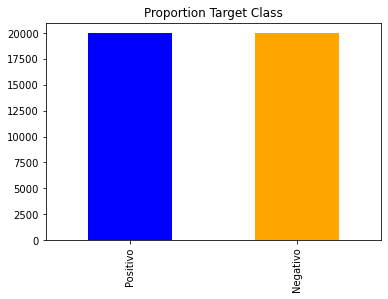

In [ ]:
count_class=pd.value_counts(tweets_df["Polaridad"], sort= True)
count_class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Proportion Target Class')
plt.show()

In [ ]:
tweets_df['Texto Preprocesado'] = tweets_df['Texto Preprocesado'].astype(str)

In [ ]:
main_text = tweets_df['Texto Preprocesado']
target = tweets_df['Polaridad']

print(len(main_text))
print(len(target))

40000
40000


In [ ]:
main_text = tweets_df['Texto Preprocesado']
target = tweets_df['Polaridad']

In [ ]:
n_classes = np.unique(target)
n_classes

array(['Negativo', 'Positivo'], dtype=object)

In [ ]:
def add_label(tweet):
    output = []
    for i, s in zip(tweet.index, tweet):
        output.append(TaggedDocument(s, ["tweet_" + str(i)]))
    return output

In [ ]:
labeled_tweets = add_label(main_text)

In [ ]:
#Necesitamos vectorizar el conjunto de tweets utilizando Doc2Vec
from gensim.models import Doc2Vec

d2v_model = Doc2Vec(vector_size=100, min_count=5, epochs=10)
d2v_model.build_vocab([i for i in tqdm(labeled_tweets)])
d2v_model.train(labeled_tweets, total_examples=len(tweets_df['Texto Preprocesado']),epochs=10)
# Crea los vectores de tweets
docvec_arrays = np.zeros((len(tweets_df['Texto Preprocesado']), 100))
for i in range(len(tweets_df)):
    docvec_arrays[i,:] = d2v_model.docvecs[i].reshape((1,100))
docvec_df = pd.DataFrame(docvec_arrays)
docvec_df.shape
# Etiqueta todos los tweets
labeled_reviews = add_label(tweets_df['Texto Preprocesado'])

100%|██████████| 40000/40000 [00:00<00:00, 1428930.51it/s]
C:\Users\curri\AppData\Local\Temp/ipykernel_10540/3853302831.py:10: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  docvec_arrays[i,:] = d2v_model.docvecs[i].reshape((1,100))


In [ ]:
#Definimos conjunto de entrenamiento y test
X = docvec_df #Tweet
y = target #Positivo o Negativo

X_train, X_test, y_train, y_test  = train_test_split(X,y,train_size=0.9,random_state=0)

In [ ]:
sgd = SGDClassifier(loss='log', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)
sgd.fit(X_train,y_train)

SGDClassifier(loss='log')

In [ ]:
sgd_predict= sgd.predict(X_test)

In [ ]:
sgd_report = accuracy_score(y_test,sgd_predict)
print('Accuracy:',sgd_report)

Accuracy: 0.77825


In [ ]:
sgd_report1 = recall_score(y_test,sgd_predict,pos_label='Positivo',average='binary')
print('Recall:',sgd_report1)

Recall: 0.7210816224336505


In [ ]:
sgd_report2 = precision_score(y_test,sgd_predict,pos_label='Positivo',average='binary')
print('Precision:',sgd_report2)

Precision: 0.8135593220338984


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

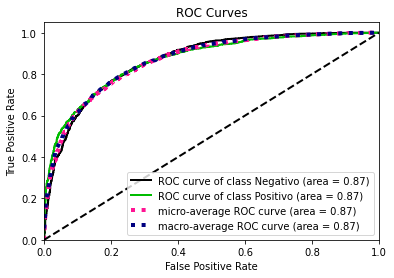

In [ ]:
skplt.metrics.plot_roc(y_test, sgd.predict_proba(X_test))